<h1><center>Libreta semanal 1</center></h1>

<center>**Computación y Análisis de Datos Geofísicos**</center>

<center>**Evelin Martínez Izaguirre***</center>
<br />
*Unidad Multidisciplinaria de Docencia e Investigación (UMDI), Facultad de Ciencias, campus Juriquilla, Querétaro.
<br />
Universidad Nacional Autónoma de México. Boulevard Juriquilla 3001, Juriquilla, Querétaro, 76230, México
e-mail: evemi@ciencias.unam.mx.
_______________________________________________________________________________________________________________________________

<h3>Regresión lineal</h3>
<div style="text-align: justify">
El análisis de regresión simple investiga la relación estadística que existe entre una variable deoendiente ($Y$) y una varibale independiente ($X$).
<br />
<br />
$Y=$ Variable dependiente: Está predicha, medida, aleatoria, explicada.
<br />
<br />
$X=$ Variable independiente: Es predictoria, controlada, no aleatoria, explicativa.
<br />
<br />
Busca una función $X_i$ muy simple (lineal) que permita aproximar $Y$ mediante:
<br />
<br />
$$Y_i=(a+bX_i)+ \epsilon_i$$
<br />
Donde:
<br />
$a=$ Punto de corte en el eje de las ordenadas, ordena al origen, constante.
<br />
<br />
$b=$ Pendiente, gradiente de la recta, coeficiente de regresión.
<br />
<br />
$\epsilon i=$ Error residual, residuo

$$\epsilon_i=Y-Y_i$$


</div>


**Cargar paqueterías**

In [1]:
using Plots

In [2]:
pyplot()

Plots.PyPlotBackend()

**Regresión lineal**

In [52]:
x=randn(100); #Generar datos

In [53]:
y=5x+10; #Ecuación de la recta con los datos generados

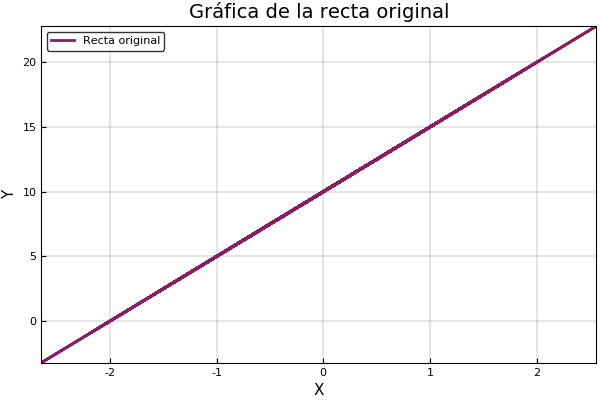

In [6]:
plot(x,y,lab="Recta original", xlabel="X", ylabel="Y", linewidth=2,title="Gráfica de la recta original", box=:true, grid=:true, grid=1.5,color="maroon4")
#legen(loc="best")
#savefig("Grafica_recta_original.png")


In [54]:
yn=y+randn(100)*1.2; #Agregando error

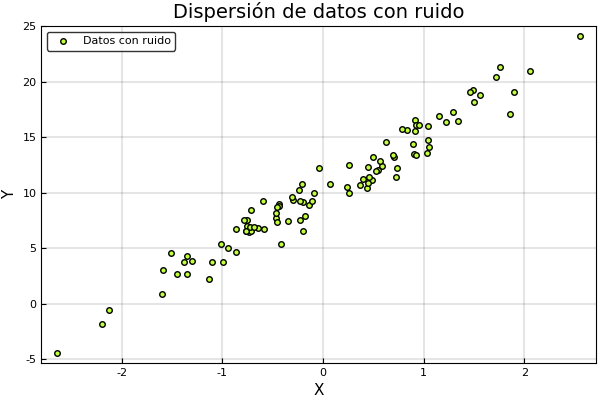

In [19]:
scatter(x,yn, lab="Datos con ruido", xlabel="X", ylabel="Y",title="Dispersión de datos con ruido", box=:true, grid=:true, grid=1.5, color="olivedrab1")

In [11]:
linreg(x,yn) #Función de ajuste

(10.133891445512042, 5.111956821018164)

In [12]:
b,m=linreg(x,yn) #Mi ajuste

(10.133891445512042, 5.111956821018164)

**Calculando con ajuste**

In [13]:
yd=m*x+b; #ajuste lineal

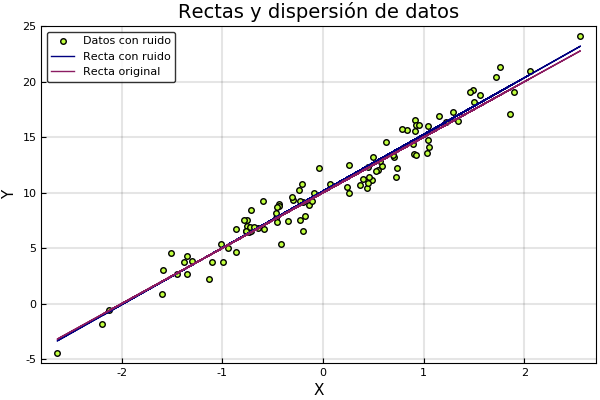

In [36]:

scatter(x,yn,lab="Datos con ruido", xlabel="X", ylabel="Y",title="Rectas y dispersión de datos", box=:true,grid=:true, grid=1.5, color="olivedrab1")
plot!(x,yd,lab="Recta con ruido", color="navy")
plot!(x,y,lab="Recta original", color="maroon4")

**Calculando el error**

In [21]:
Er=y-yn;

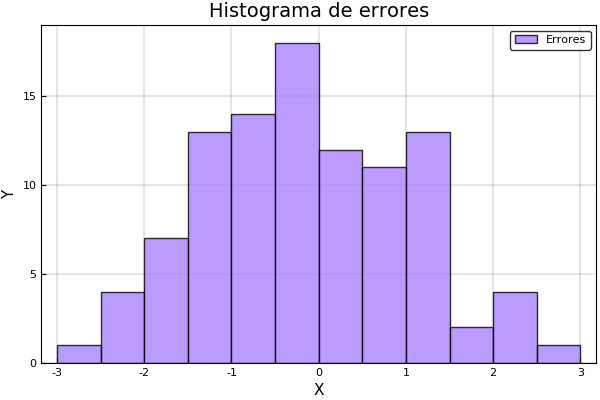

In [37]:
#scatter(x,yn,lab="Datos con ruido", xlabel="X", ylabel="Y",title="Rectas y dispersión de datos", box=:true)
#plot!(x,yd,lab="Recta con ruido")
#plot!(x,y,lab="Recta original")


#errorbar!(x,y, yerr=E, fmt="o") #Dice que errorbar no está definido por lo que se hizo un histograma de los errores

histogram(Er, lab="Errores", bins=20, xlabel="X", ylabel="Y",title="Histograma de errores", box=:True, color="white",alpha=0.8, color="mediumpurple1", grid=:true,grid=1.5, ylims=(0,19))

In [31]:
std(Er) #Desviación estándar del error

1.1833152683127979

<h3>Mínimos cuadrados</h3>
<div style="text-align: justify">
El método de mínimos cuadrados se llama así porque obedece a encontrar la recta que proporcione las mínimas distancias entre dicha recta y los puntos u observaciones.Las distancias,los residuos o errores, son elevadas al cuadrado.
<br />
<br />
Utiliza las siguientes funciones:
<br />
<br />
$$\Delta = n \Sigma x^2 - (\Sigma x)^2$$ 
<br />
<br />
$$b = \displaystyle{(\Sigma x^2 \Sigma y -\Sigma x \Sigma xy)\over \Delta}$$
<br />
<br />
$$m = \displaystyle{(n \Sigma xy -\Sigma x \Sigma y)\over \Delta}$$
<br />
<br />
Error cuadrático medio: $$\sqrt{(\Sigma (y-y´)^2\over n}$$
<br />
<br />
Coeficiente de correlación de Pearson: $$ \Sigma (x_i - \bar{x}) (y_i - \bar{y})\over \sqrt{\Sigma (x_i-\bar{x})^2 \Sigma (y_i-\bar{y})^2} )$$
<br />
<br />
El **análisis de variaranza** (ANOVA), se refiere en general a un conjunto de situaciones experimentales y procedimientos estadísticos para el análisis de respuestas cuantitativas de unidades expermientales. El problema más sencillo de ANOVA se conoce como el análisis de varianza de un solo factor o diseño completamente al zar, éste se utiliza para comparar dos o más tratamientos y el error aleatorio.
<br />
<br />
Anova: $$L_{xx} = \Sigma (x_i)^2 - {(\Sigma x_i)^2\over n}$$
<br />
<br />
$$L_{yy} = \Sigma (y_i)^2 - {(\Sigma y_i)^2\over n}$$
<br />
<br />
$$L_{yx} = \Sigma x_i y_i - {(\Sigma x_i)(\Sigma y_i)\over n}$$
<br />
<br />
$$b = {L_{yx}\over L{xx}}$$
</div>

In [60]:
function mc(x,y)
    
    n=length(x)
    xs=sum(x)
    ys=sum(y)
    sx=sum(x.^2)
    sxc=(sum(x)).^2
    sxy=sum(x.*y)
    xp=mean(x)
    yp=mean(y)
    
    del=(n*sx)-sxc
    
    A=((sx*ys)-(xs*sxy))/del
    
    B=((n*sxy)-(xs*ys))/del
    
    E=sqrt((sum((y-(B.*x+A)).^2))/n)
    
    sc=sum((x.-xp).*(y.-yp))
    
    rc=sqrt((sum((x.-xp).^2)).*(sum((y.-yp).^2)))
    
    CP=sc/rc
    
    #ANOVA
    Lxx=sx-(sxc/n)
    Lyx=sxy-(((xs)*(ys))/n)
    
    b=Lyx/Lxx

    return A, B, E, CP, b 
    
end

mc (generic function with 1 method)

In [61]:
mc(x,yn)

(9.974955188591979, 4.716084974635642, 1.276109617535592, 0.9611686068199107, 4.716084974635643)

In [62]:
cor(x,yn) #Comprobando el Coeficiente de Correlación de Pearson

0.9611686068199103

<h3>Funciones</h3>

Suma: 

$$\Sigma xi=x_1+x_2+x_3+...$$

Promedio:

$$\bar{X} = \frac{\Sigma xi}{n}$$

Desviación estándar: 

$$\sqrt{(\Sigma (xi- \bar{x})^2)\over n}$$

In [39]:
xf=collect(2:10); #Creando un vector

In [40]:
sum(x), mean(x), std(x) #Funciones de Julia

(54, 6.0, 2.7386127875258306)

In [41]:
#Suma, promedio y desviación estándar
    
function pyd3(x)
    su=0
    
    for i=1:length(x)
        su=su + x[i]
        
    end
    prom=su/length(x)
    de=0
    for i=1:length(x)
        sud=(x[i]-prom).^2
        de=(de + sud)
        
        
    end
    
    de=sqrt(de/(length(x)-1))
    
    println("Suma=", su," ", "Promedio=",prom, " ", "DesEst= ", de) 
    
end

pyd3 (generic function with 1 method)

In [42]:
pyd3(x) #Comprobando con mi función

Suma=54 Promedio=6.0 DesEst= 2.7386127875258306


<h3>Referencias</h3>
<ul>
    
<li>Vinuesa (2016). *Tema 9-Regresión lineal simple y polinomial: teorÍa y práctica*. Consultado en: http://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html el 04/06/18.</li>    

<li>Barón F. (s.a). *15.Regresión lineal*. Consultado en: https://matap.dmae.upm.es/WebpersonalBartolo/Probabilidad/15_RegresionLineal.pdf el 09/06/18.</li>  

<li>Sin autor (s.a). *Análisis de regresión lineal*. Consultado en: http://www.geociencias.unam.mx/~ramon/EstInf/Clase17.pdf el 09/06/18.</li>
<br />
<li>Sin autor (s.a). *Análisis de la Varianza ANOVA*. consultado en: http://asesorias.cuautitlan2.unam.mx/Laboratoriovirtualdeestadistica/CARPETA%203%20INFERENCIA_ESTADISTICA/DOC_%20INFERENCIA/TEMA%204/11%20ANALISIS%20DE%20VARIANZA.pdf el 11/06/18.</li>

</ul>